<a href="https://colab.research.google.com/github/eruds/Keras_Practice_DeepLizard/blob/master/Keras_with_TensorFlow_Deeplizard_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random Data Generation 
train_labels = []
train_samples = []
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [3]:
# Processing the Data
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

# Scale data range into between 0 to 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Activation, Dense
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [5]:
# Explicitly defining hidden layers 
# All number are arbitrary
model = Sequential ([
      Dense( units = 16, input_shape=(1,), activation='relu'), 
      Dense( units = 32, activation='relu'),
      Dense( units = 2, activation="softmax")
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Getting the model ready for training 
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model 
# Batch Size is choosen arbritrary 
# Epoch means how many times the model will train on each data in the set. 
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=1)

Epoch 1/30
210/210 [==============================] - 2s 3ms/step - loss: 0.6812 - accuracy: 0.5800
Epoch 2/30
210/210 [==============================] - 1s 3ms/step - loss: 0.6543 - accuracy: 0.6871
Epoch 3/30
210/210 [==============================] - 1s 4ms/step - loss: 0.6260 - accuracy: 0.7462
Epoch 4/30
210/210 [==============================] - 1s 3ms/step - loss: 0.6018 - accuracy: 0.7543
Epoch 5/30
210/210 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7676
Epoch 6/30
210/210 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7843
Epoch 7/30
210/210 [==============================] - 1s 3ms/step - loss: 0.5287 - accuracy: 0.8010
Epoch 8/30
210/210 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.8229
Epoch 9/30
210/210 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.8348
Epoch 10/30
210/210 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.8519

In [9]:
# Building validation set 
# The goal is to avoid the overfitting problem 
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2779 - accuracy: 0.9333 - val_loss: 0.2312 - val_accuracy: 0.9381 - 484ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2761 - accuracy: 0.9317 - val_loss: 0.2289 - val_accuracy: 0.9476 - 272ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2746 - accuracy: 0.9370 - val_loss: 0.2268 - val_accuracy: 0.9476 - 279ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2730 - accuracy: 0.9365 - val_loss: 0.2248 - val_accuracy: 0.9476 - 322ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2718 - accuracy: 0.9370 - val_loss: 0.2230 - val_accuracy: 0.9476 - 280ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2704 - accuracy: 0.9370 - val_loss: 0.2210 - val_accuracy: 0.9476 - 285ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2694 - accuracy: 0.9370 - val_loss: 0.2195 - val_accuracy: 0.9476 - 275ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2683 - accuracy: 0.9370 - val_loss: 0.2183 - val_accuracy: 0.9476 - 328ms/epoch - 2ms/step


In [10]:
# Making Test Sets
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [11]:
# Predict the test data
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [14]:
# Rounded Prediction => Shows more binary result rather than probability 
rounded_predictions = np.argmax(predictions, axis=-1)

In [15]:
# Confusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [19]:
# Define plot confusion matrix function 
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


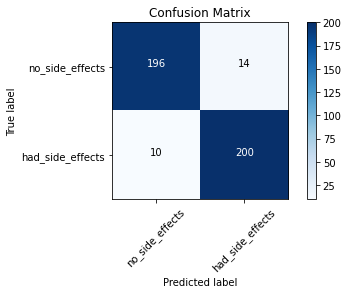

In [18]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [20]:
# Saving and Loading a model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 1. Model.save()
# Checks first to see if file exist already 
# If not, the model is saved to disk 
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False :
  model.save('models/medical_trial_model.h5')

In [26]:
# Load Model 
from keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')
# Check loaded model weights and architecture
new_model.summary()
new_model.weights
new_model.optimizer
new_model.loss

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


<function keras.losses.sparse_categorical_crossentropy>

In [33]:
# 2. Model to JSON => Only the architecture
# Can also do the same thing with YAML string 
import json
json_string = model.to_json()
json_string = model.to_json(indent=4)

with open('json_data.json', 'w') as outfile:
    outfile.write(json_string)

In [ ]:
# Load model from JSON
from keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

In [ ]:
# 3. Saving only the weigths
model.save_weights('models/my_model_weights.h5')
# Loading the weight into another model with the same architecture
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model2.weights
model2.load_weights('models/my_model_weights.h5')
model2.weights